In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')
# https://www.kaggle.com/uciml/sms-spam-collection-dataset

## 1. Data Exploration

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5449,spam,"Latest News! Police station toilet stolen, cop...",NaN,NaN,NaN
2150,ham,"The table's occupied, I'm waiting by the tree",NaN,NaN,NaN
2355,ham,"Hello, my love ! How went your day ? Are you a...",NaN,NaN,NaN
2621,ham,Lol! Nah wasn't too bad thanks. Its good to b ...,NaN,NaN,NaN
672,spam,Get ur 1st RINGTONE FREE NOW! Reply to this ms...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
1586,ham,There are no other charges after transfer char...
2951,ham,Tell me whos this pls:-)
4065,ham,Fyi I'm gonna call you sporadically starting a...
3382,ham,K... Must book a not huh? so going for yoga ba...
3337,ham,"K, if u bored up just come to my home.."


In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)
#renaming the cols

,target,text
1699,ham,Ok...
3768,ham,Was gr8 to see that message. So when r u leavi...
4108,ham,I want to lick your pussy now...
2922,ham,Fine am simply sitting.
5054,ham,Am on a train back from northampton so i'm afr...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
#check for duplicate values
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
value_counts = df['target'].value_counts()
value_counts

target
0    4516
1     653
Name: count, dtype: int64

## 2. Data Cleaning

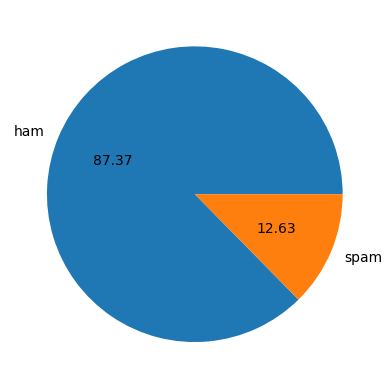

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
# Data is imbalanced

In [20]:
import nltk

In [21]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
df['num_characters']=df['text'].apply(len)

In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
# num of words
df['num_sentences']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24
1,0,Ok lar... Joking wif u oni...,29,8,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37
3,0,U dun say so early hor... U c already then say...,49,13,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15


In [28]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,18.455794
std,58.236293,13.324758,13.324758
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,9.000000
50%,60.000000,15.000000,15.000000
75%,117.000000,26.000000,26.000000
max,910.000000,220.000000,220.000000


In [29]:
#ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,17.123782
std,56.358207,13.493970,13.493970
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,8.000000
50%,52.000000,13.000000,13.000000
75%,90.000000,22.000000,22.000000
max,910.000000,220.000000,220.000000


In [30]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,27.667688
std,30.137753,7.008418,7.008418
min,13.000000,2.000000,2.000000
25%,132.000000,25.000000,25.000000
50%,149.000000,29.000000,29.000000
75%,157.000000,32.000000,32.000000
max,224.000000,46.000000,46.000000


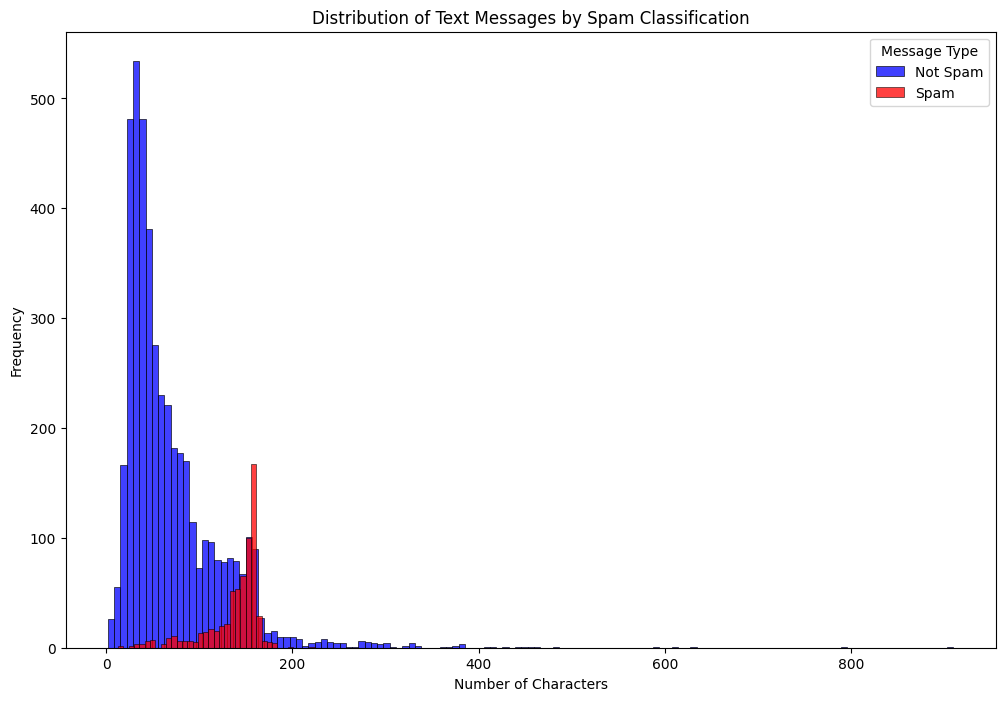

In [31]:
# Create the plot
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', label='Not Spam')
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Spam')

# Add title and labels
plt.title('Distribution of Text Messages by Spam Classification')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

# Add a legend
plt.legend(title='Message Type')

# Display the plot
plt.show()

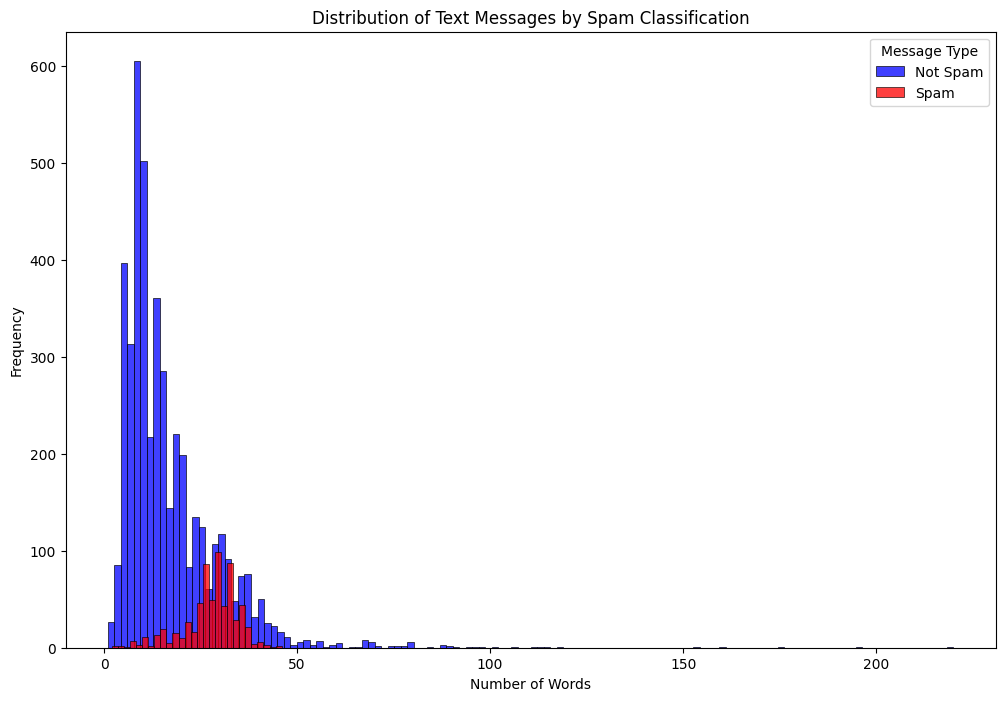

In [32]:
# Create the plot
plt.figure(figsize=(12, 8))
sns.histplot(df[df['target'] == 0]['num_words'], color='blue', label='Not Spam')
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Spam')

# Add title and labels
plt.title('Distribution of Text Messages by Spam Classification')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Add a legend
plt.legend(title='Message Type')

# Display the plot
plt.show()


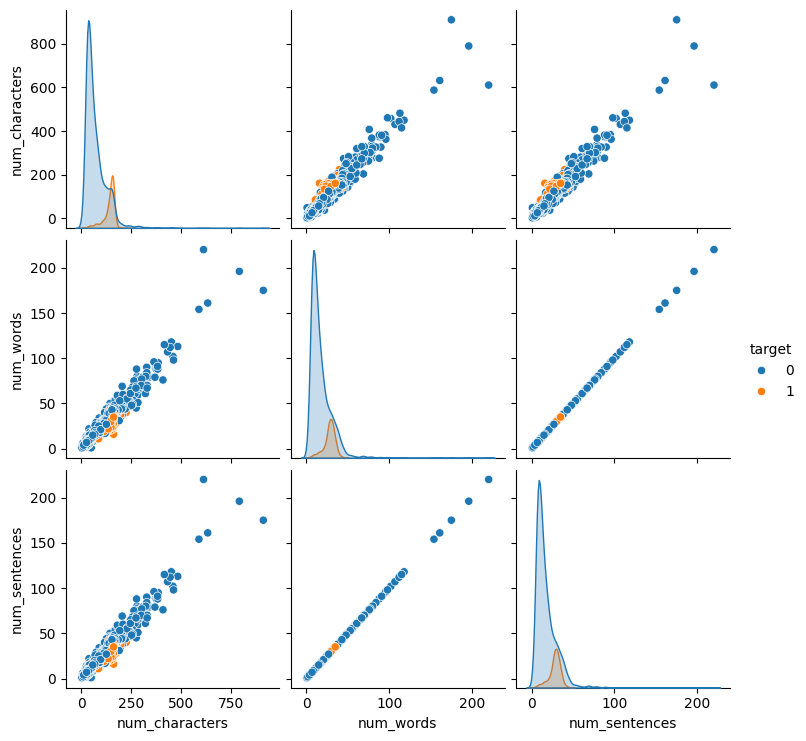

In [33]:
sns.pairplot(df,hue='target')

In [34]:
numeric_df = df.select_dtypes(include=[float, int])
numeric_df

,target,num_characters,num_words,num_sentences
0,0,111,24,24
1,0,29,8,8
2,1,155,37,37
3,0,49,13,13
4,0,61,15,15
...,...,...,...,...
5567,1,161,35,35
5568,0,37,9,9
5569,0,57,15,15
5570,0,125,27,27


In [35]:
numeric_df = numeric_df.fillna(numeric_df.mean())
numeric_df

,target,num_characters,num_words,num_sentences
0,0,111,24,24
1,0,29,8,8
2,1,155,37,37
3,0,49,13,13
4,0,61,15,15
...,...,...,...,...
5567,1,161,35,35
5568,0,37,9,9
5569,0,57,15,15
5570,0,125,27,27


In [36]:
corr_matrix = numeric_df.corr()
corr_matrix

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.262912
num_characters,0.384717,1.000000,0.965760,0.965760
num_words,0.262912,0.965760,1.000000,1.000000
num_sentences,0.262912,0.965760,1.000000,1.000000


<Axes: >

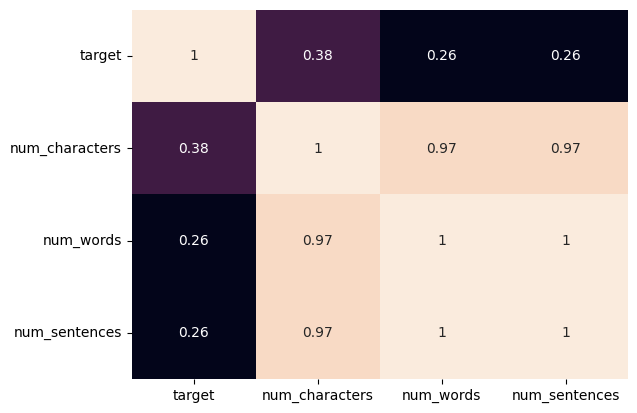

In [37]:
sns.heatmap(corr_matrix, annot=True, cbar=False)

## 3. DATA PROCESSING


In [38]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    
    return " ".join(y)

In [39]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [40]:
from nltk.corpus import stopwords
import string

In [41]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [42]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [43]:
df['transformed_text'] = df['text'].apply(transform_text)

In [44]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,nah think goe usf live around though


In [45]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [46]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

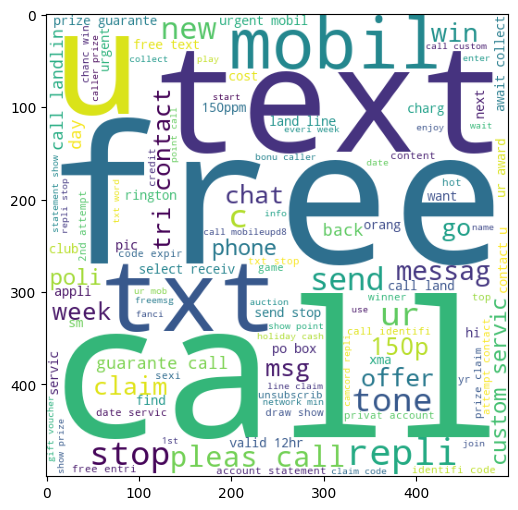

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [48]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

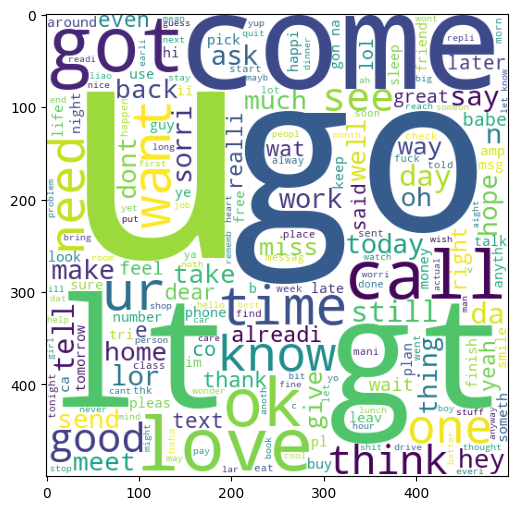

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [50]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,nah think goe usf live around though


In [51]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [52]:
len(spam_corpus)

9939

In [53]:
from collections import Counter
 # will return dict where key=word in corpus value = n0. of occurence

In [54]:
# Get the 30 most common words and their counts
most_common_words = Counter(spam_corpus).most_common(30)

In [55]:
common_words_df = pd.DataFrame(most_common_words, columns=['word', 'count'])
# Convert to DataFrame


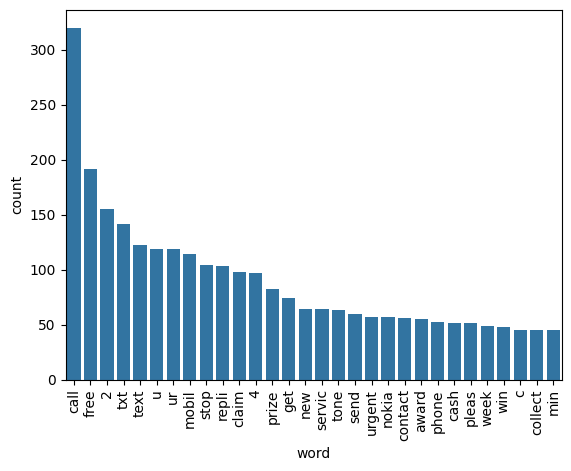

In [56]:
sns.barplot(x='word', y='count', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()

In [57]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [58]:
len(ham_corpus)

35404

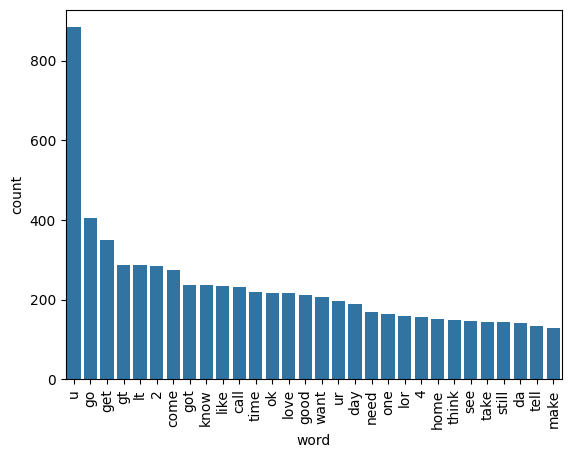

In [59]:
from collections import Counter
most_common_words = Counter(ham_corpus).most_common(30)

# Convert to DataFrame
common_words_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Plot using sns.barplot
sns.barplot(x='word', y='count', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()

In [60]:
#Text vextorization
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,nah think goe usf live around though


## 4. MODEL BUILDING


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(max_features=3500)

In [62]:
 ## create vectors of transformed text feature and then stored it in x variable
x = tf_idf.fit_transform(df["transformed_text"]).toarray()
y = df["target"].values

In [63]:
x.shape

(5169, 3500)

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=2)

In [66]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [67]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [68]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8700696055684455
[[992 138]
 [ 30 133]]
0.4907749077490775


In [69]:
# now try to train MultinomialNB(), it will work
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test, y_pred))

0.9721577726218097
[[1130    0]
 [  36  127]]
1.0


In [70]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.982985305491106
[[1128    2]
 [  20  143]]
0.9862068965517241


### 4.1. Comparing accuracies of 10 classificartion models

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [72]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [73]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': bnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [74]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [75]:
train_classifier(svc,x_train,y_train,x_test,y_test)
# support vector classifier

(0.9752513534416086, 0.9781021897810219)

In [76]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9752513534416086
Precision -  0.9781021897810219


  File "C:\Users\Parth Sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Parth Sharma\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Parth Sharma\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Parth Sharma\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


For  KN
Accuracy -  0.9095127610208816
Precision -  1.0
For  NB
Accuracy -  0.982985305491106
Precision -  0.9862068965517241
For  DT
Accuracy -  0.9303944315545244
Precision -  0.8173913043478261
For  LR
Accuracy -  0.9535962877030162
Precision -  0.9557522123893806
For  RF
Accuracy -  0.9767981438515081
Precision -  0.9854014598540146
For  AdaBoost
Accuracy -  0.9651972157772621
Precision -  0.9538461538461539
For  BgC
Accuracy -  0.9566898685228151
Precision -  0.8543046357615894
For  ETC
Accuracy -  0.9791183294663574
Precision -  0.9788732394366197
For  GBDT
Accuracy -  0.9535962877030162
Precision -  0.9478260869565217
For  xgb
Accuracy -  0.9675174013921114
Precision -  0.9481481481481482


In [84]:
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Accuracy', ascending=False)
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.982985,0.986207
8,ETC,0.979118,0.978873
5,RF,0.976798,0.985401
0,SVC,0.975251,0.978102
10,xgb,0.967517,0.948148
6,AdaBoost,0.965197,0.953846
7,BgC,0.956690,0.854305
4,LR,0.953596,0.955752
9,GBDT,0.953596,0.947826
3,DT,0.930394,0.817391


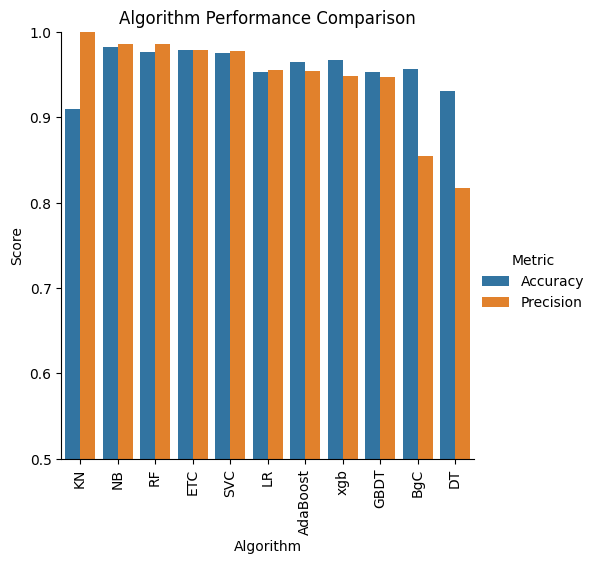

In [83]:
# Melt the DataFrame to long format
melted_df = performance_df.melt(id_vars='Algorithm', var_name='Metric', value_name='Score')

# Plot using Seaborn
sns.catplot(x='Algorithm', y='Score', hue='Metric', data=melted_df, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.title("Algorithm Performance Comparison")
plt.show()

### 4.2 Making a Voting Classifier with the 3 best models(with top 3 accuracies).

In [85]:
from sklearn.ensemble import VotingClassifier
import joblib

x = tf_idf.fit_transform(df["transformed_text"]).toarray()
y = df["target"].values

# Splitting the data into train and test sets (example)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df["transformed_text"], df["target"], test_size=0.2, random_state=42)

# Transform the raw text data using TF-IDF vectorizer
x_train_tf_idf = tf_idf.fit_transform(x_train)
x_test_tf_idf = tf_idf.transform(x_test)

# Define the classifiers
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
bnb = BernoulliNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

# Create a voting classifier
voting = VotingClassifier(estimators=[ ('nb', bnb) , ('et', etc) , ('rf' , rfc)], voting='soft')
voting.fit(x_train_tf_idf, y_train)

# Save the trained model and vectorizer
joblib.dump(voting, 'spam_classifier.pkl')
joblib.dump(tf_idf, 'tf_idf_vectorizer.pkl')

['tf_idf_vectorizer.pkl']

### 4.3 Create an interface(using Tkinker) to test the text for spam.

In [86]:
import tkinter as tk
from tkinter import messagebox, scrolledtext
import joblib

# Load the trained model and vectorizer
voting = joblib.load('spam_classifier.pkl')
tf_idf_vectorizer = joblib.load('tf_idf_vectorizer.pkl')

def predict_spam():
    text = text_area.get("1.0", tk.END).strip()
    if not text:
        messagebox.showwarning("Input Error", "Please enter some text!")
        return
    
    # Transform the input text using the fitted TF-IDF vectorizer
    transformed_text = tf_idf_vectorizer.transform([text])
    prediction = voting.predict(transformed_text)
    
    result = "Spam" if prediction[0] == 1 else "Not Spam"
    messagebox.showinfo("Prediction Result", f"The message is: {result}")

# Create the main application window
app = tk.Tk()
app.title("SMS Spam Classifier")
app.geometry("500x400")

# Create and place the components in the window
frame = tk.Frame(app, padx=10, pady=10)
frame.pack(expand=True, fill=tk.BOTH)

label = tk.Label(frame, text="Enter SMS Text:", font=('Helvetica', 14))
label.pack(pady=10)

text_area = scrolledtext.ScrolledText(frame, wrap=tk.WORD, width=50, height=10, font=('Helvetica', 12))
text_area.pack(pady=10, expand=True, fill=tk.BOTH)

predict_button = tk.Button(frame, text="Predict", command=predict_spam, font=('Helvetica', 14), bg='lightblue')
predict_button.pack(pady=20)

# Run the application
app.mainloop()